### Importing Dependencies

In [19]:
from random import randint as rnd
import matplotlib.pyplot as plt
from random import sample
import numpy as np
from numba import jit
from copy import deepcopy

### Setting The Problem and Algorithm Parameters

In [20]:
N = 50
PS = 2000   #Population Size
MR = 0.8    #Mutation Rate
Epoch = 400

### Initial Population Function

In [21]:
def init_population(n, ps):
    # n_1 = n-1
    # return [[rnd(0, n_1) for j in range(n)]+[None] for i in range(ps)]
    # ********************************
    # return [sample(range(n), n)+[None] for i in range(ps)]
    # ********************************
    arr = np.random.randint(n, size=(ps*2, n+1))
    arr[:, -1] = 0
    return arr

### Cross Over Function

In [22]:
@jit
def cross_over(population_list, n , ps):
    half = n//2
    for i in range(0, ps, 2):
        population_list[ps+i][:half]= population_list[i][:half]
        population_list[ps+i][half:n]= population_list[i+1][half:n]
        population_list[ps+i+1][:half]= population_list[i+1][:half]
        population_list[ps+i+1][half:n]= population_list[i][half:n]
    return population_list

### Mutation Rate

In [23]:
@jit
def mutation(population_list, n, ps, mr):
    choosen_ones = np.random.randint(ps, ps*2, size=(1, int(ps*mr)))
    n_1 = n-1
    for i in choosen_ones[0]:
        cell = rnd(0, n_1)
        val = rnd(0, n_1)
        population_list[i][cell]=val
    return population_list

### Fitness Function

In [24]:
@jit
def fitness(population_list, n):
    length = len(population_list)
    for i in range(length):
        conflict = 0
        for j in range(n):
            for k in range(j+1, n):
                #column
                if population_list[i][j]==population_list[i][k]:
                    conflict+=1
                #diagnial
                if abs(j-k)==abs(population_list[i][j]-population_list[i][k]):
                    conflict+=1                  
        population_list[i][-1]=conflict
        
    return population_list

### Presentation Function

In [25]:
def show(solution, n):
    plt.figure(figsize=(5, 5))
    for i in range(n+1):
        plt.plot([0, n*2], [i*2, i*2])
        plt.plot([i*2, i*2], [0, n*2])
    for i in range(n):
        plt.scatter([i*2+1], solution[i]*2+1)
    plt.show()

### Main

127 Solution Found:  [43 34 16 45 17 44  0 27 15 28 14 33 21 49 11  2 39 25  8 37 48 19 10  7
 30  6  1 26 38 40 35 47 32 24  4 36  9 22 12 42 23 20 31 29 46 13 41  5
  3 18  0]


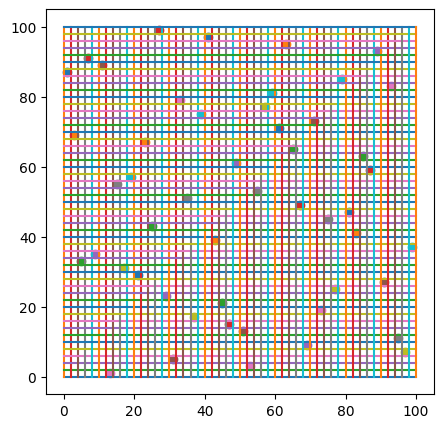

In [26]:
current_population = init_population(N, PS)
current_population = fitness(deepcopy(current_population), N)
# current_population = sorted(deepcopy(current_population), key=lambda x:x[-1])
current_population = deepcopy(current_population)[deepcopy(current_population)[:, -1].argsort()]
if current_population[0][-1]==0:
    print("Solution is found in the initial population stage: ", current_population[0])
    show(current_population[0], N)
else:
    for i in range(Epoch):
        current_population = cross_over(deepcopy(current_population), N, PS)
        current_population = mutation(deepcopy(current_population), N, PS, MR)
        current_population = fitness(deepcopy(current_population), N)
        # current_population = sorted(current_population, key=lambda x:x[-1])
        current_population = deepcopy(current_population)[deepcopy(current_population)[:, -1].argsort()]
        if current_population[0][-1]==0:
            print(i+1, "Solution Found: ", current_population[0])
            show(current_population[0], N)
            break
        else:
            print(i+1, " ==> ", current_population[0][-1])
    else:
        print("Sorry, We could not find you a solution.")